In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import uuid

f:\a02_env_ware\ana\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


加载数据

In [2]:
# 读取数据
df = pd.read_csv('BTC_USDT_1day_2021.1.1-2021.12.31一年数据.csv')

In [3]:
df.head()

,Unnamed: 0,datatime,open,high,low,close,volume
0,0,1609459200000,28923.63,29600.00,28624.57,29331.69,54182.925011
1,1,1609545600000,29331.70,33300.00,28946.53,32178.33,129993.873362
2,2,1609632000000,32176.45,34778.11,31962.99,33000.05,120957.566750
3,3,1609718400000,33000.05,33600.00,28130.00,31988.71,140899.885690
4,4,1609804800000,31989.75,34360.00,29900.00,33949.53,116049.997038


回测

In [10]:
ori_capital = 100000.0 # 初始金额
capital = ori_capital # 当前可用资金

in_ratio = 0.30 # 投资比例 
commission_rate = 0.001  # 手续费率

all_trades = [] # 用于存储所有交易记录的列表

In [ ]:

for i in range(len(df)):

    # 计算交易规则
    data = df.iloc[i] # 当天数据
    open_price = data['open']    # 开盘价
    close_price = data['close']  # 收盘价
    high_price = data['high'] # 最高价
    low_price = data['low'] # 最低价

    current_date = data['datatime']
    time = datetime.fromtimestamp(current_date / 1000) # 转换为可读时间


    # 买入
    in_price = open_price # 买入价格
    in_money = capital * in_ratio # 购买金额
    buy_commission = in_money * commission_rate # 买入手续费
    buy_amount = (in_money - buy_commission)/in_price # 购买数量

    capital = capital - in_money # 余额变化

    # 卖出
    out_price = close_price # 卖出价格
    sell_money = out_price * buy_amount # 卖出金额
    sell_commission = sell_money * commission_rate # 卖出手续费
    out_money = sell_money - sell_commission # 最终卖出金额

    capital = capital + out_money # 余额变化

    # 计算本次交易信息
    trade = {
        'uuid': str(uuid.uuid4()) , # 交易ID
        'symbol': 'BTC_USDT',  # 交易品种

        'in_price':in_price, # 买入价格
        'out_price':out_price, # 卖出价格

        'stop_loss_price':0.0, # 止损价格
        'stop_make_price':0.0, # 止盈价格

        'commission_rate':commission_rate, # # 手续费率
        'commission':0.0, # 固定手续费

        'profit': out_money-in_money, # 这笔交易最终盈利

        'quantity':buy_amount, # 交易仓位 交易数量

        'in_time': time, # 买入时间
        'out_time': time, # 卖出时间

        'direction':0, # 交易方向 做多 做空
    }


    # 记录本次交易信息
    all_trades.append(trade)


# 将交易记录转换为DataFrame
trades_df = pd.DataFrame(all_trades)

In [12]:
trades_df.head()

,uuid,symbol,in_price,out_price,stop_loss_price,stop_make_price,commission_rate,commission,profit,quantity,in_time,out_time,direction
0,7b5a8ac8-8275-47eb-a2fb-f6cdcf06240b,BTC_USDT,28923.63,29331.69,0.0,0.0,0.001,0.0,362.429562,1.036177,2021-01-01 08:00:00,2021-01-01 08:00:00,0
1,398b81be-ceac-4e65-b355-e45801bd07e2,BTC_USDT,29331.70,32178.33,0.0,0.0,0.001,0.0,2856.011840,1.025465,2021-01-02 08:00:00,2021-01-02 08:00:00,0
2,628ecda2-67cd-4e6d-839e-39e1e2b80c64,BTC_USDT,32176.45,33000.05,0.0,0.0,0.001,0.0,729.120401,0.961404,2021-01-03 08:00:00,2021-01-03 08:00:00,0
3,f45bb63c-8876-4648-a44a-79356a828f97,BTC_USDT,33000.05,31988.71,0.0,0.0,0.001,0.0,-1016.119359,0.944031,2021-01-04 08:00:00,2021-01-04 08:00:00,0
4,89270e04-0171-4612-8466-9052245a93c9,BTC_USDT,31989.75,33949.53,0.0,0.0,0.001,0.0,1826.249301,0.964326,2021-01-05 08:00:00,2021-01-05 08:00:00,0


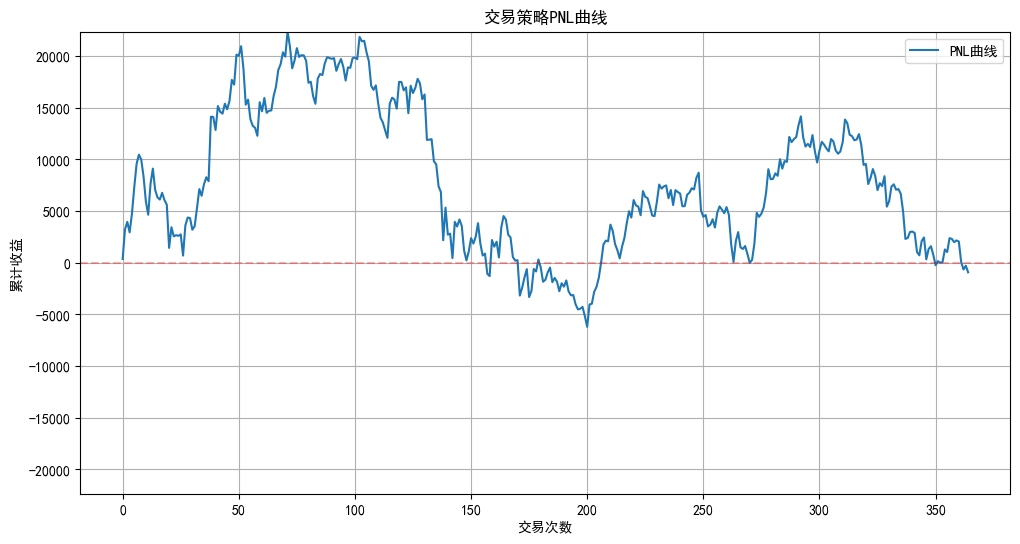

In [13]:
# pnl曲线

import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 计算累计收益
pnl = trades_df['profit'].cumsum()

# 获取y轴的最大绝对值，用于设置对称的y轴范围
y_max = max(abs(pnl.max()), abs(pnl.min()))

# 绘制PNL曲线
plt.figure(figsize=(12, 6))
plt.plot(pnl, label='PNL曲线')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)  # 添加y=0的参考线
plt.title('交易策略PNL曲线')
plt.xlabel('交易次数')
plt.ylabel('累计收益')
plt.grid(True)
plt.legend()

# 设置y轴范围，使0为中心
plt.ylim(-y_max, y_max)

plt.show()

In [20]:
# ——————交易次数 
trade_count = len(trades_df)
print(f'交易次数：{trade_count}')



# ——————胜率
win_count = len(trades_df[trades_df['profit'] > 0])
win_rate = win_count / trade_count * 100
print(f'胜率：{win_rate:.2f}%')

# ——————交易频率 平均持仓时间

# ——————盈亏比

# 盈利 和 亏损 交易
win_trades = trades_df[trades_df['profit'] > 0]
loss_trades = trades_df[trades_df['profit'] < 0]

# 计算平均值
avg_profit = win_trades['profit'].mean()
avg_loss = abs(loss_trades['profit'].mean())  # 取绝对值，使结果为正数

# 计算盈亏比
risk_reward_ratio = avg_profit / avg_loss
print(f'盈亏比：{risk_reward_ratio:.2f}')

# ——————最大连续亏损次数
is_loss = trades_df['profit'] < 0
current_loss_count = 0
max_loss_count = 0

for i in is_loss:
    if i:
        current_loss_count += 1
    else:
        max_loss_count = max(max_loss_count, current_loss_count)
        current_loss_count = 0
print(f'最大连续亏损次数：{max_loss_count}')


# ——————最大回撤
''' 最低点-最高点/最高点'''
# 计算累计收益
pnl = trades_df['profit'].cumsum()
# 资产净值曲线
capital_curve = pnl + ori_capital
# 计算累计最大值
rolling_max = capital_curve.expanding().max()
# 计算回撤
drawdown = (rolling_max - capital_curve) / rolling_max
# 计算最大回撤
max_drawdown = drawdown.max()

print(f'最大回撤：{max_drawdown:.2%}')  # 使用.2%来格式化为百分比


# ——————夏普比
'''
夏普比率 = 收益  / 收益的标准差
'''
# 计算每笔交易的收益率
returns = trades_df['profit'] / ( trades_df['in_price'] * trades_df['quantity'])

# 计算平均值
mean_return = returns.mean()

# 计算标准差
std_return = returns.std()

# 计算日夏普
sharpe_daily = mean_return / std_return
# 计算年夏普
sharpe_yearly = (mean_return / std_return) * np.sqrt(365)

print(f'夏普比率：{sharpe_yearly:.2f}')

交易次数：365
胜率：48.77%
盈亏比：1.05
最大连续亏损次数：5
最大回撤：23.34%
夏普比率：0.08
